In [ ]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

In [ ]:
# Scrape Insigne player stats:
cris_scrape_url = "https://understat.com/player/1393"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

insigne_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
insigne_season_wise_meta_df.insert(0, "Player", "Insigne")

In [ ]:
insigne_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Insigne,FWL,1,1,5,87,1.6714372634887695,0,0.34817951917648315,1,2021,Napoli,0,0,0,0.1488395780324936,0.40694695711135864,0.058767449110746384
1,Insigne,FWL,35,19,144,2888,17.34749484434724,7,9.122002026066184,63,2020,Napoli,2,1,12,11.257104076445103,27.064160227775574,12.54643751308322
2,Insigne,ML,37,8,120,2852,13.023432699032128,6,7.6686373967677355,85,2019,Napoli,1,0,3,9.216978487558663,22.409113943576813,11.923517782241106
3,Insigne,FWL,28,10,120,2081,10.424117786809802,6,5.122348241508007,64,2018,Napoli,6,1,9,8.901560051366687,19.246918447315693,7.503334891051054
4,Insigne,FWL,37,8,177,3115,14.667035412043333,11,12.84046172350645,103,2017,Napoli,4,0,7,13.90573663637042,32.68386163562536,14.485567647963762
5,Insigne,FWL,37,18,147,2946,14.799433965235949,9,7.879277715459466,66,2016,Napoli,2,0,16,13.276836339384317,33.14796829968691,18.729353815317154
6,Insigne,AMC,37,12,134,2639,9.908442457206547,10,9.11415692884475,65,2015,Napoli,2,0,10,8.385844831354916,23.265476390719414,8.545032993424684
7,Insigne,AML,20,2,43,1058,4.300668630748987,3,3.913240445777774,34,2014,Napoli,0,0,2,3.53936979547143,9.302804877981544,3.4607097944244742


In [ ]:
# Scrape Insigne shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

insigne_shots_df = pd.json_normalize(json.loads(json_data))
insigne_shots_df.insert(0, "Player", "Insigne")

In [ ]:
insigne_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Insigne,41484,80,MissedShots,0.8440000152587891,0.5520000076293945,0.03919287770986557,Lorenzo Insigne,a,1393,SetPiece,2014,RightFoot,5155,Genoa,Napoli,1,2,2014-08-31 19:45:00,Dries Mertens,Cross
1,Insigne,41486,82,SavedShot,0.8490000152587891,0.485,0.24112387001514435,Lorenzo Insigne,a,1393,OpenPlay,2014,RightFoot,5155,Genoa,Napoli,1,2,2014-08-31 19:45:00,Dries Mertens,Pass
2,Insigne,41851,17,MissedShots,0.7440000152587891,0.47,0.022258618846535683,Lorenzo Insigne,h,1393,OpenPlay,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,Gonzalo Higuaín,Pass
3,Insigne,41859,32,BlockedShot,0.6990000152587891,0.509000015258789,0.014582442119717598,Lorenzo Insigne,h,1393,OpenPlay,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,José Callejón,Pass
4,Insigne,41860,33,MissedShots,0.7340000152587891,0.505,0.054349545389413834,Lorenzo Insigne,h,1393,DirectFreekick,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Insigne,427900,5,BlockedShot,0.7280000305175781,0.519000015258789,0.05068476125597954,Lorenzo Insigne,h,1393,DirectFreekick,2021,RightFoot,16762,Napoli,Venezia,2,0,2021-08-22 18:45:00,None,Standard
886,Insigne,427902,12,BlockedShot,0.7219999694824218,0.66,0.03840776905417442,Lorenzo Insigne,h,1393,DirectFreekick,2021,RightFoot,16762,Napoli,Venezia,2,0,2021-08-22 18:45:00,None,Standard
887,Insigne,427908,31,BlockedShot,0.7530000305175781,0.6029999923706054,0.05974704399704933,Lorenzo Insigne,h,1393,DirectFreekick,2021,RightFoot,16762,Napoli,Venezia,2,0,2021-08-22 18:45:00,None,Standard
888,Insigne,427912,56,MissedShots,0.885,0.5,0.7612988352775574,Lorenzo Insigne,h,1393,Penalty,2021,RightFoot,16762,Napoli,Venezia,2,0,2021-08-22 18:45:00,None,Standard


In [ ]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
1,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
2,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
3,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
4,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
5,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
6,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


In [ ]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
season_wise_meta_df = insigne_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Insigne,FWL,1,1,5,87,1.6714372634887695,0,0.34817951917648315,1,2021,Napoli,0,0,0,0.1488395780324936,0.40694695711135864,0.058767449110746384
1,Insigne,FWL,35,19,144,2888,17.34749484434724,7,9.122002026066184,63,2020,Napoli,2,1,12,11.257104076445103,27.064160227775574,12.54643751308322
2,Insigne,ML,37,8,120,2852,13.023432699032128,6,7.6686373967677355,85,2019,Napoli,1,0,3,9.216978487558663,22.409113943576813,11.923517782241106
3,Insigne,FWL,28,10,120,2081,10.424117786809802,6,5.122348241508007,64,2018,Napoli,6,1,9,8.901560051366687,19.246918447315693,7.503334891051054
4,Insigne,FWL,37,8,177,3115,14.667035412043333,11,12.84046172350645,103,2017,Napoli,4,0,7,13.90573663637042,32.68386163562536,14.485567647963762
5,Insigne,FWL,37,18,147,2946,14.799433965235949,9,7.879277715459466,66,2016,Napoli,2,0,16,13.276836339384317,33.14796829968691,18.729353815317154
6,Insigne,AMC,37,12,134,2639,9.908442457206547,10,9.11415692884475,65,2015,Napoli,2,0,10,8.385844831354916,23.265476390719414,8.545032993424684
7,Insigne,AML,20,2,43,1058,4.300668630748987,3,3.913240445777774,34,2014,Napoli,0,0,2,3.53936979547143,9.302804877981544,3.4607097944244742
0,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
1,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716


In [ ]:
shots_df = insigne_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Insigne,41484,80,MissedShots,0.8440000152587891,0.5520000076293945,0.03919287770986557,Lorenzo Insigne,a,1393,SetPiece,2014,RightFoot,5155,Genoa,Napoli,1,2,2014-08-31 19:45:00,Dries Mertens,Cross
1,Insigne,41486,82,SavedShot,0.8490000152587891,0.485,0.24112387001514435,Lorenzo Insigne,a,1393,OpenPlay,2014,RightFoot,5155,Genoa,Napoli,1,2,2014-08-31 19:45:00,Dries Mertens,Pass
2,Insigne,41851,17,MissedShots,0.7440000152587891,0.47,0.022258618846535683,Lorenzo Insigne,h,1393,OpenPlay,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,Gonzalo Higuaín,Pass
3,Insigne,41859,32,BlockedShot,0.6990000152587891,0.509000015258789,0.014582442119717598,Lorenzo Insigne,h,1393,OpenPlay,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,José Callejón,Pass
4,Insigne,41860,33,MissedShots,0.7340000152587891,0.505,0.054349545389413834,Lorenzo Insigne,h,1393,DirectFreekick,2014,RightFoot,5113,Napoli,Chievo,0,1,2014-09-14 14:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [ ]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

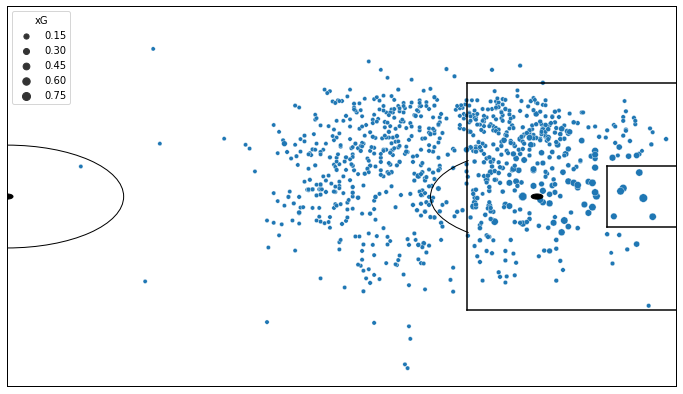

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Insigne"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

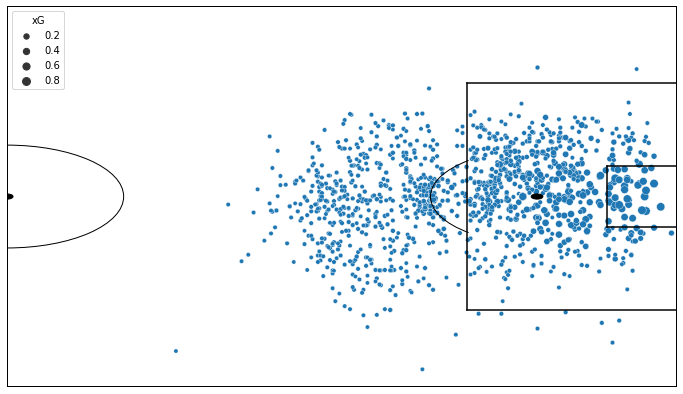

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

Insigne Heat Map


(0.0, 0.74)

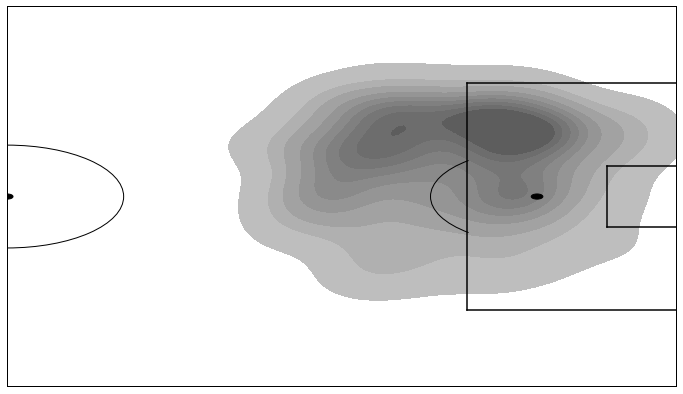

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)
print("Insigne Heat Map")
sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Insigne"], shade=True, n_levels=10, ax=ax1, color="black")

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

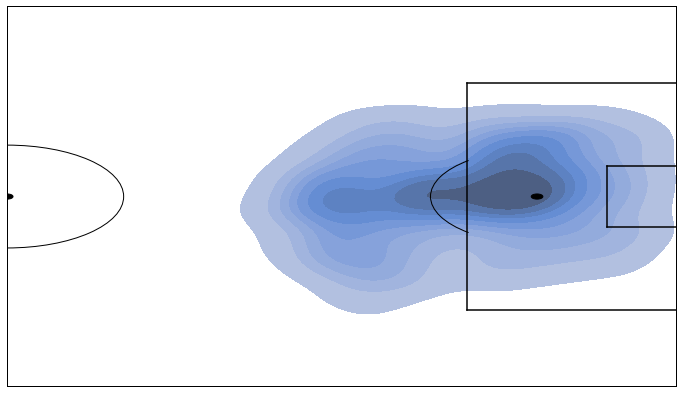

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1, color="#152238")

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Insigne,FWL,1,1,5,87,1.671437,0,0.348180,1,2021,Napoli,0,0,0,0.148840,0.406947,0.058767
1,Insigne,FWL,35,19,144,2888,17.347495,7,9.122002,63,2020,Napoli,2,1,12,11.257104,27.064160,12.546438
2,Insigne,ML,37,8,120,2852,13.023433,6,7.668637,85,2019,Napoli,1,0,3,9.216978,22.409114,11.923518
3,Insigne,FWL,28,10,120,2081,10.424118,6,5.122348,64,2018,Napoli,6,1,9,8.901560,19.246918,7.503335
4,Insigne,FWL,37,8,177,3115,14.667035,11,12.840462,103,2017,Napoli,4,0,7,13.905737,32.683862,14.485568
5,Insigne,FWL,37,18,147,2946,14.799434,9,7.879278,66,2016,Napoli,2,0,16,13.276836,33.147968,18.729354
6,Insigne,AMC,37,12,134,2639,9.908442,10,9.114157,65,2015,Napoli,2,0,10,8.385845,23.265476,8.545033
7,Insigne,AML,20,2,43,1058,4.300669,3,3.913240,34,2014,Napoli,0,0,2,3.539370,9.302805,3.460710
0,Messi,FW,35,30,195,3017,26.676843,9,11.422848,77,2020,Barcelona,4,0,27,22.960455,37.906863,20.337363
1,Messi,Sub,33,25,159,2876,20.849667,20,16.593363,88,2019,Barcelona,4,0,20,17.133279,34.923467,13.537658


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Insigne,232,78,890,17666,86.142063,52,56.008304,481,16140,17,2,59,68.632270,167.527251,77.252722
1,Messi,243,231,1244,20524,192.348809,97,105.890147,596,14119,27,0,203,163.361494,298.746363,119.294823


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

In [ ]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,0.397373,4.534133,0.438853,0.264916,0.285336,2.450470,0.853473,0.393566
1,1.012960,5.455077,0.843471,0.425356,0.464340,2.613526,1.310036,0.523121


In [ ]:
radar_df[cols_for_radar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goalsPer90       2 non-null      float64
 1   shotsPer90       2 non-null      float64
 2   xGPer90          2 non-null      float64
 3   assistsPer90     2 non-null      float64
 4   xAPer90          2 non-null      float64
 5   key_passesPer90  2 non-null      float64
 6   xGChainPer90     2 non-null      float64
 7   xGBuildupPer90   2 non-null      float64
dtypes: float64(8)
memory usage: 256.0 bytes


In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,Insigne,232,78,890,17666,86.142063,52,56.008304,481,16140,17,2,59,68.632270,167.527251,77.252722,0.397373,4.534133,0.438853,0.264916,0.285336,2.450470,0.853473,0.393566
1,Messi,243,231,1244,20524,192.348809,97,105.890147,596,14119,27,0,203,163.361494,298.746363,119.294823,1.012960,5.455077,0.843471,0.425356,0.464340,2.613526,1.310036,0.523121


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Insigne"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Insigne'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Insigne vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
sns.scatterplot(x=[	'1'],y=['0'	] , data = rdf_t,hue= 'time',palette='viridis')

ValueError: ignored

In [ ]:
rdf_t = radar_df.transpose()

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,0.397373,4.534133,0.438853,0.264916,0.285336,2.450470,0.853473,0.393566
1,1.012960,5.455077,0.843471,0.425356,0.464340,2.613526,1.310036,0.523121


In [ ]:
radar_df[cols_for_radar].diff()

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.615587,0.920944,0.404617,0.16044,0.179004,0.163056,0.456563,0.129554


In [ ]:
a = np.array([radar_df[cols_for_radar].head(1)])

In [ ]:
b = np.array([radar_df[cols_for_radar].tail(1)])

In [ ]:
a2=a*a

In [ ]:
b2=b*b

In [ ]:
b2-a2

array([[[0.86818316, 9.19949953, 0.51885045, 0.11074715, 0.13419491,
         0.82571383, 0.98777751, 0.11876096]]])